In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [2]:
RC_circuit_db = pd.read_csv('./datasets/db_completa_RC_Tecnologia.csv')
RC_circuit_db.head()

,time,voltaje_ent,voltaje_cap_5,R_5,C_5,voltaje_cap_8,R_8,C_8,voltaje_cap_10,R_10,C_10,voltaje_cap_12,R_12,C_12,voltaje_cap_15,R_15,C_15
0,0,4.93,0.00,55300,0.0001,0.00,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
1,200,4.93,0.00,55300,0.0001,0.12,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
2,400,4.93,0.02,55300,0.0001,0.30,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
3,600,4.93,0.24,55300,0.0001,0.50,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.00,14920,0.001
4,800,4.93,0.43,55300,0.0001,0.66,1750,0.0047,0.0,99300,0.0001,0.0,53100,0.00022,0.04,14920,0.001


In [3]:
RC_circuit_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            4000 non-null   int64  
 1   voltaje_ent     4000 non-null   float64
 2   voltaje_cap_5   4000 non-null   float64
 3   R_5             4000 non-null   int64  
 4   C_5             4000 non-null   float64
 5   voltaje_cap_8   4000 non-null   float64
 6   R_8             4000 non-null   int64  
 7   C_8             4000 non-null   float64
 8   voltaje_cap_10  4000 non-null   float64
 9   R_10            4000 non-null   int64  
 10  C_10            4000 non-null   float64
 11  voltaje_cap_12  4000 non-null   float64
 12  R_12            4000 non-null   int64  
 13  C_12            4000 non-null   float64
 14  voltaje_cap_15  4000 non-null   float64
 15  R_15            4000 non-null   int64  
 16  C_15            4000 non-null   float64
dtypes: float64(11), int64(6)
memory u

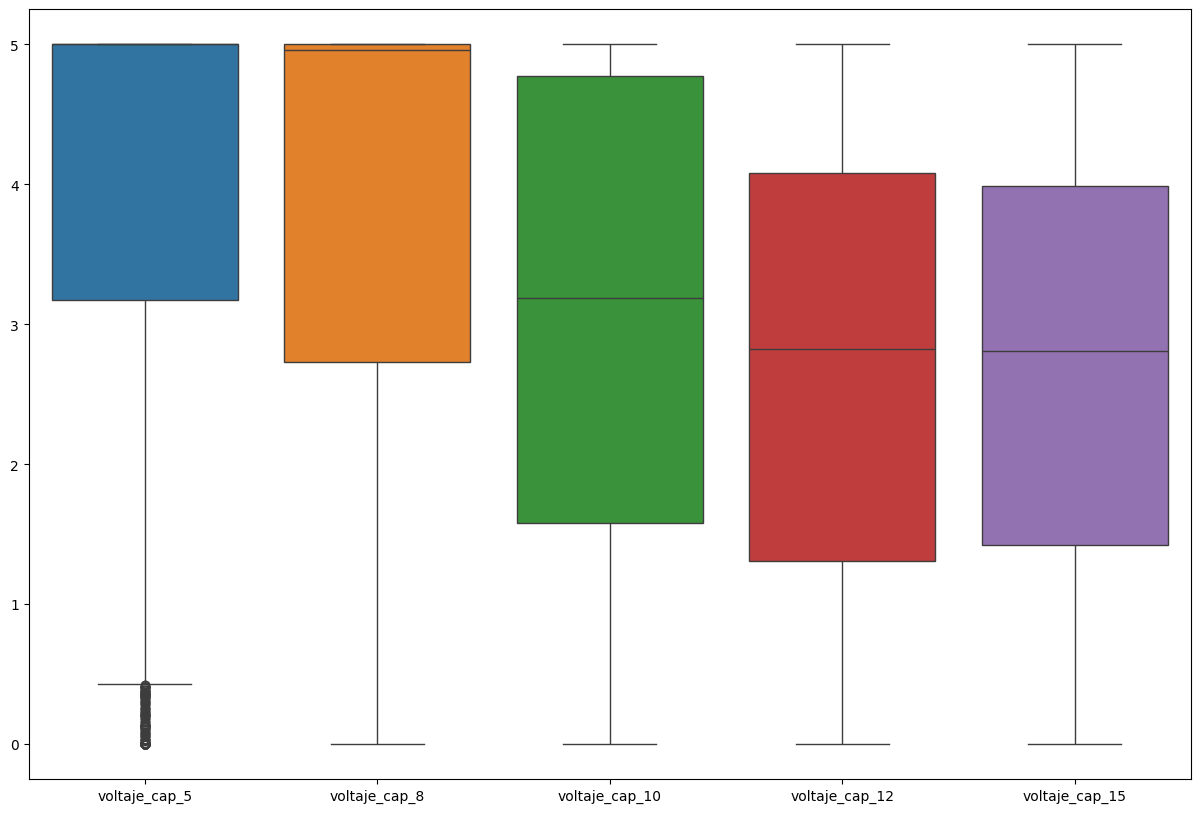

In [4]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.boxplot(data = RC_circuit_db.drop(['time', 'voltaje_ent', 'R_5', 'C_5', 'R_8', 'C_8', 'R_10', 'C_10', 'R_12', 'C_12', 'R_15', 'C_15'], axis = 1))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

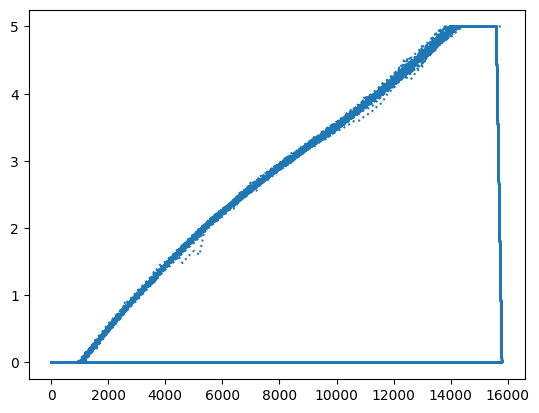

In [5]:
plt.figure()
plt.plot(RC_circuit_db['time'], RC_circuit_db['voltaje_cap_12'],':')
plt.show

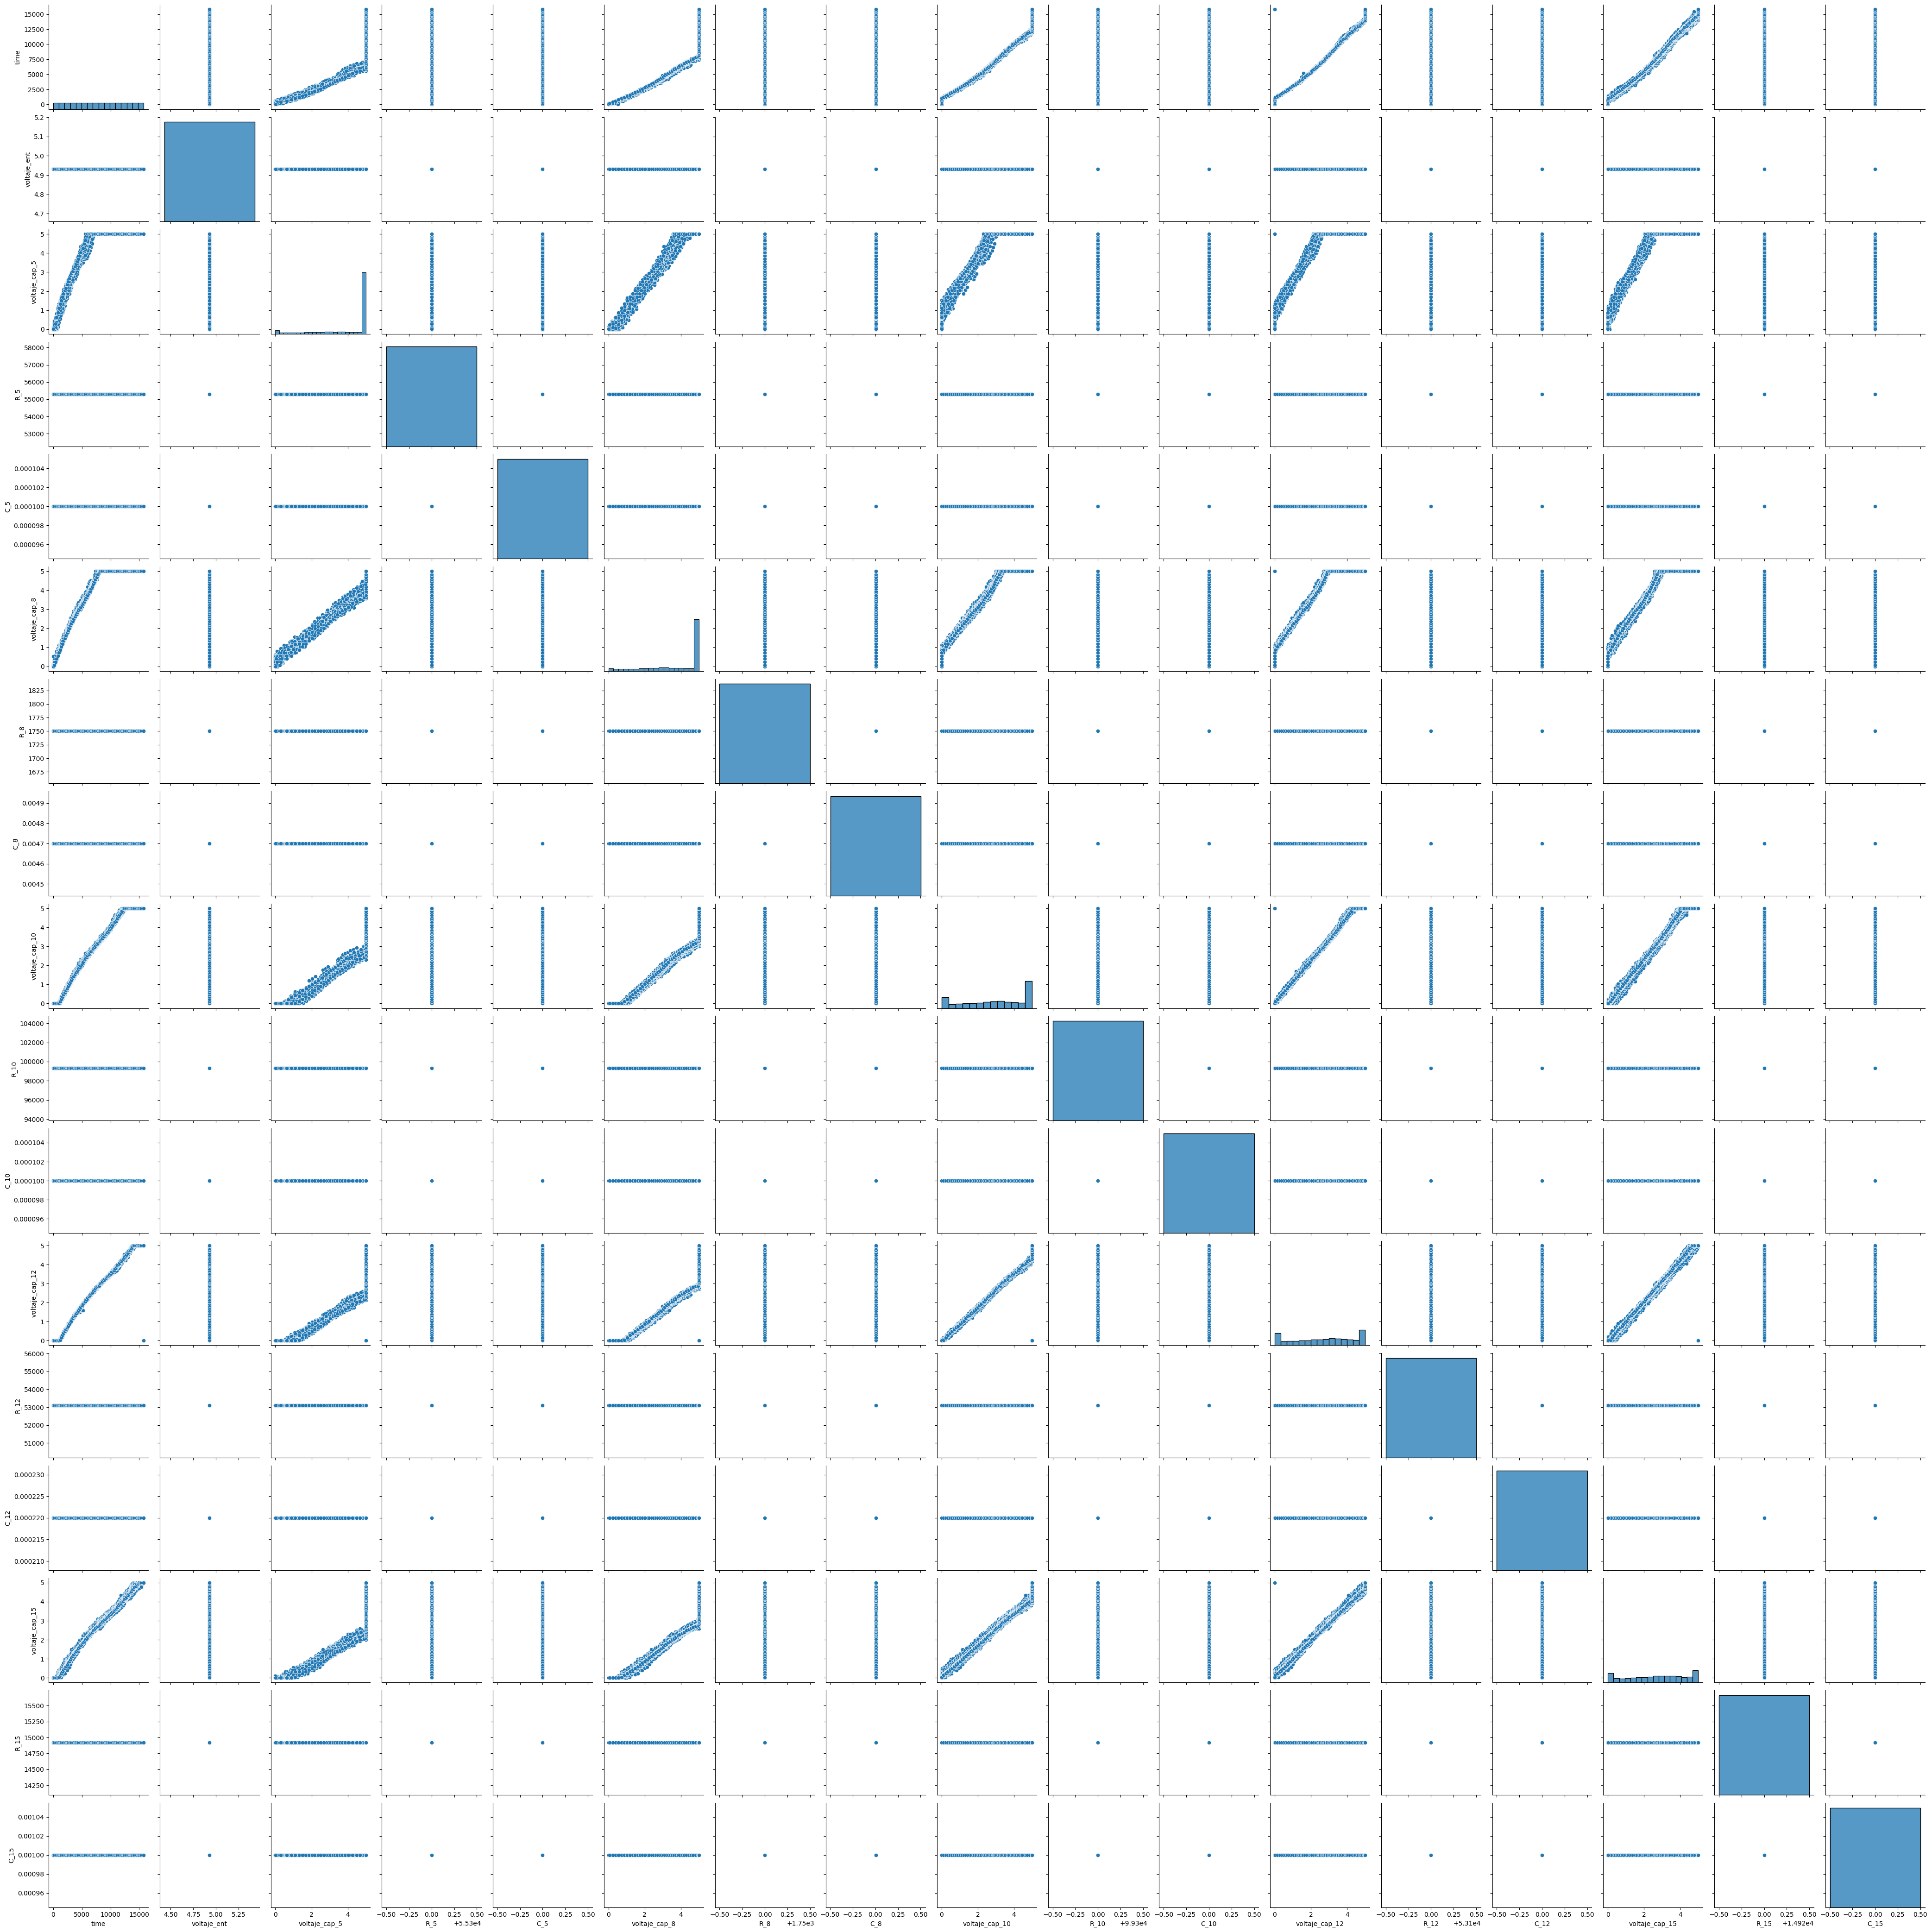

In [6]:
#Plot pairwise relationships in a dataset.
sns.pairplot(RC_circuit_db)
plt.show()

In [7]:
# Correlation between variables
def fcn_corr_matrix(corr_mat):
    '''
    Function to convert a panda correlation matrix into tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [8]:
corr_matrix = RC_circuit_db.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fcn_corr_matrix(corr_matrix).head(10)

,var_1,var_2,r,abs_r
5,time,voltaje_cap_15,0.995425,0.995425
30,voltaje_cap_15,time,0.995425,0.995425
23,voltaje_cap_10,voltaje_cap_15,0.989313,0.989313
33,voltaje_cap_15,voltaje_cap_10,0.989313,0.989313
18,voltaje_cap_10,time,0.984534,0.984534
3,time,voltaje_cap_10,0.984534,0.984534
13,voltaje_cap_8,voltaje_cap_5,0.976791,0.976791
8,voltaje_cap_5,voltaje_cap_8,0.976791,0.976791
27,voltaje_cap_12,voltaje_cap_10,0.945008,0.945008
22,voltaje_cap_10,voltaje_cap_12,0.945008,0.945008


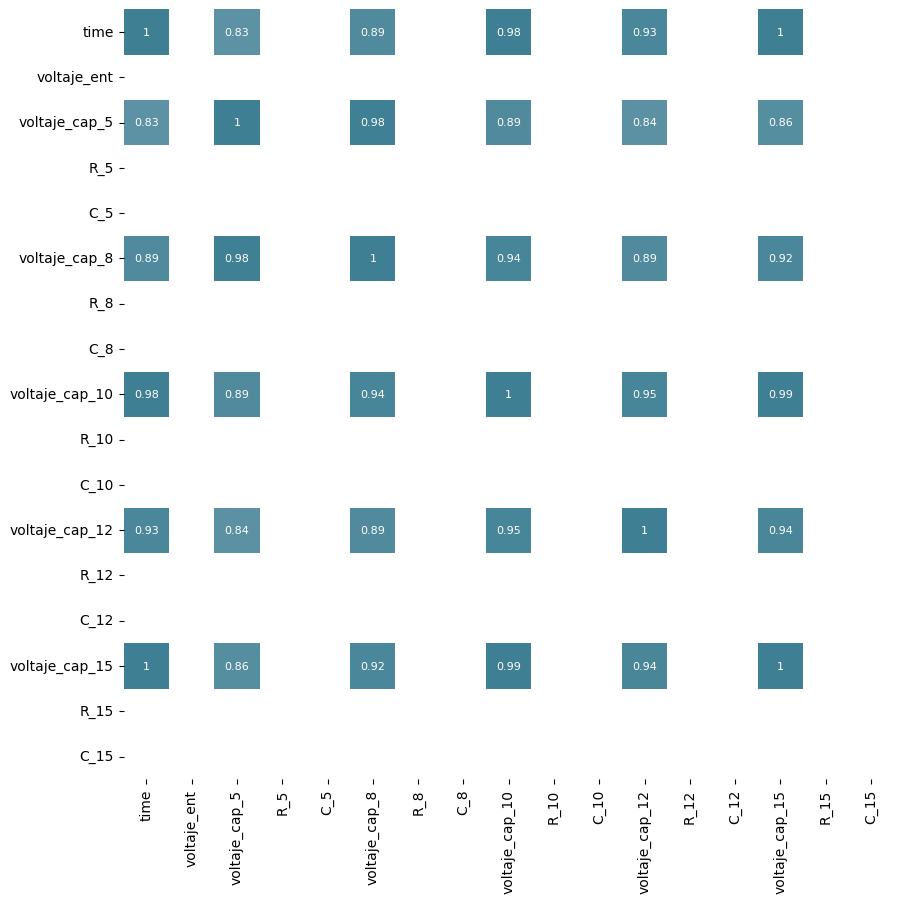

In [9]:
# Matriz de correlacion utilizando seaborn
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)
plt.show()

In [10]:
#X = [tiempo, R, C, Ve]
#y = [Vc]


R = np.hstack([RC_circuit_db['R_5'], RC_circuit_db['R_8'], RC_circuit_db['R_10'], RC_circuit_db['R_12'], RC_circuit_db['R_15']])
C = np.hstack([RC_circuit_db['C_5'], RC_circuit_db['C_8'], RC_circuit_db['C_10'], RC_circuit_db['C_12'], RC_circuit_db['C_15']])
t = np.hstack([RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time'], RC_circuit_db['time']])
Ve = np.hstack([RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent'], RC_circuit_db['voltaje_ent']])

# Input variables
X = np.vstack([R, C, t, Ve]).T

# Target
y = np.hstack([RC_circuit_db['voltaje_cap_5'], RC_circuit_db['voltaje_cap_8'], RC_circuit_db['voltaje_cap_10'], RC_circuit_db['voltaje_cap_12'], RC_circuit_db['voltaje_cap_15']])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2002)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 4)
(6000, 4)
(14000,)
(6000,)


In [12]:
#%% Specify the model
model = LinearRegression()

#%% Fit model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          )

LinearRegression()

In [13]:
# Predict on training data
pred_tr = model.predict(X_train)

# Predict on a test data
pred_te = model.predict(X_test)

In [14]:
print("RMSE (train):", np.sqrt(np.mean( (y_train-pred_tr)**2) ))
print("RMSE (test):", np.sqrt(np.mean( (y_test-pred_te)**2) ))

RMSE (train): 0.7831599427559048
RMSE (test): 0.7849437007829371


In [15]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [16]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.7853
MAE:  0.5565
MSE:  0.6133
R²:  0.7853

---------- Evaluation on Test Data ----------
explained_variance:  0.7873
MAE:  0.5601
MSE:  0.6161
R²:  0.7873


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0     0.613339    0.785338    0.616137   0.787265


In [17]:
#scaler = preprocessing.MinMaxScaler(feature_range = (0.1, 0.9))
#X_pol = PolynomialFeatures(degree=2, include_bias=False).fit_transform(scaler.fit_transform(X))
X_pol = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size = 0.30, random_state = 2002)

In [18]:
#%% Specify the model
model_pol = LinearRegression()

#%% Fit model on the dataset
model_pol.fit(X_train_pol, # input data
              y_train, # target data
             )

LinearRegression()

In [19]:
y_pred_pol_train = model_pol.predict(X_train_pol)
y_pred_pol_test = model_pol.predict(X_test_pol)

In [20]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, y_pred_pol_train)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, y_pred_pol_test)
print("")


---------- Evaluation on Training Data ----------
explained_variance:  0.9362
MAE:  0.3068
MSE:  0.1822
R²:  0.9362

---------- Evaluation on Test Data ----------
explained_variance:  0.9375
MAE:  0.3056
MSE:  0.181
R²:  0.9375



In [21]:
print("Coeficientes del modelo lineal: ", model.coef_)
print("Intercepto del modelo lineal: ", model.intercept_)

Coeficientes del modelo lineal:  [4.42906154e-06 1.95748548e+02 3.19641552e-04 2.00391040e-24]
Intercepto del modelo lineal:  0.26837698220808504


In [22]:
print("Coeficientes del modelo polinomial: ", model_pol.coef_)
print("Intercepto del modelo polinomial: ", model_pol.intercept_)

Coeficientes del modelo polinomial:  [-1.71814561e-06 -8.78342852e+00  2.42544541e-05  6.42224745e-07
  2.49315235e-10 -2.15385088e-01  4.54661975e-10 -8.48222680e-06
 -5.29256710e-02  8.66323635e-04 -4.33048941e+01 -2.19055882e-08
  1.26002944e-04  1.01039103e-17]
Intercepto del modelo polinomial:  3.391713101598614


# Evaluación estadística del modelo
## Prueba de pendiente-intercepto

Verma and Cruz-Huicochea: Precise and accurate Student's T CV, Journal of Iberian GeologSim 39(1): 31-56, 2013.

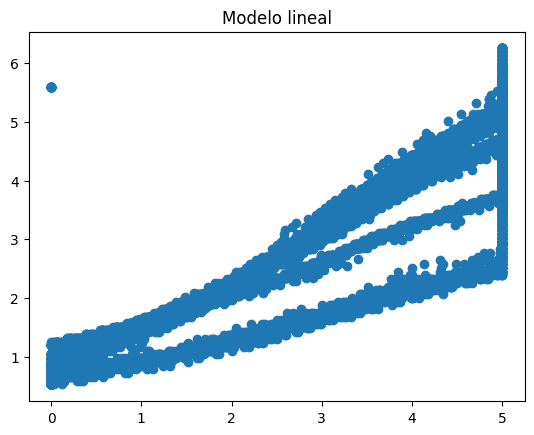

In [23]:
plt.figure()
plt.title('Modelo lineal')
plt.scatter(y_train, pred_tr)
plt.show()

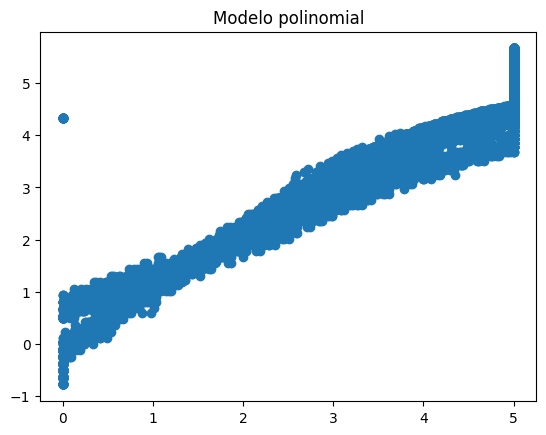

In [24]:
plt.figure()
plt.title('Modelo polinomial')
plt.scatter(y_train, y_pred_pol_train)
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
y_train_ppi1 = sm.add_constant(y_train, prepend=True)
ppi1 = sm.OLS(pred_tr, y_train_ppi1)
ppi1 = ppi1.fit()
print(ppi1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 5.121e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:01:40   Log-Likelihood:                -14752.
No. Observations:               14000   AIC:                         2.951e+04
Df Residuals:                   13998   BIC:                         2.952e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6948      0.013     54.830      0.0

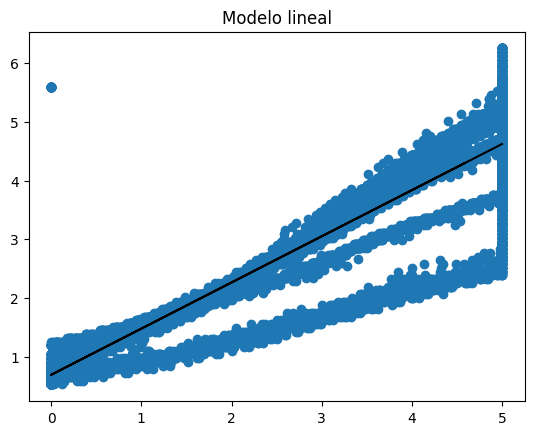

In [31]:
plt.figure()
plt.title('Modelo lineal')
plt.scatter(y_train, pred_tr)
plt.plot(y_train, ppi1.params[1]*y_train + ppi1.params[0], 'k')
plt.show()

In [28]:
y_train_ppi2 = sm.add_constant(y_train, prepend=True)
ppi2 = sm.OLS(y_pred_pol_train, y_train_ppi2)
ppi2 = ppi2.fit()
print(ppi2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 2.056e+05
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:01:40   Log-Likelihood:                -7483.6
No. Observations:               14000   AIC:                         1.497e+04
Df Residuals:                   13998   BIC:                         1.499e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2064      0.008     27.366      0.0

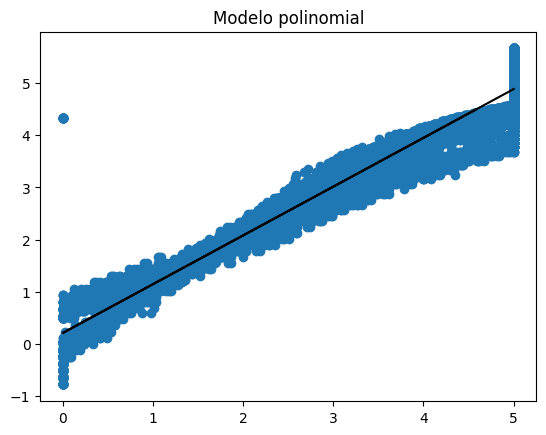

In [30]:
plt.figure()
plt.title('Modelo polinomial')
plt.scatter(y_train, y_pred_pol_train)
plt.plot(y_train, ppi2.params[1]*y_train + ppi2.params[0], 'k')
plt.show()